In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import copy

## (a) Run the Perceptron algorithm to compute a linear classifier that passes through the origin.

In [2]:
def perceptron(S, I, converge=1):
    # initialization
    w = [0 for d in range( len(S[0][0]) )]
    W = []
    for e in range(I):
        mistakes = 0 # number of mistakes made in each epoch
        for i in range(len(S)): # iterate over dataset
            if S[i][1] * np.dot(w, S[i][0]) <= 0: # label not agree with prediction
                mistakes += 1
                w += np.dot(S[i][1], S[i][0])
        W.append(copy.deepcopy(w)) # save w after each epoch
        if ( 1 - mistakes / len(S) ) >= converge: # converges
            break
    return W

In [5]:
def accuracy(S, W):
    accuracy = []
    for e in range(len(W)): # for each epoch
        mistakes = 0
        for i in range(len(S)): # count mistakes
            if S[i][1] * np.dot(W[e], S[i][0]) <= 0: # label not agree with prediction
                mistakes += 1
        accuracy.append( 1 - mistakes / len(S) ) # update list of accuracy for each epoch
    return accuracy

In [5]:
# observed data
X=[ ([.75,.10], -1),
    ([.85,.80], -1),
    ([.85,.95],  1),
    ([.15,.10], -1),
    ([.05,.25],  1),
    ([.05,.50],  1),
    ([.85,.25], -1)]

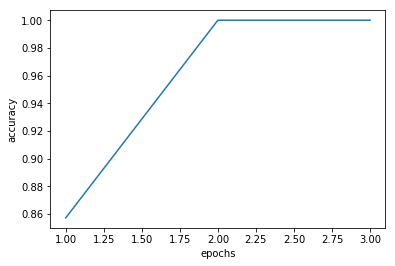

In [13]:
# run perceptron algorithm and draw the evolution of accuracy after each epoch
W=perceptron(X,100)
acc=accuracy(X,W)
plt.plot(range(1, len(acc)+1), acc)
plt.xlabel('epochs')
plt.ylabel('accuracy')
pass

It takes 2 epochs of iteration of the dataset to converge. The error is 0.

In [7]:
W

[array([-0.9,  0.5]), array([-1.05,  1.1 ]), array([-1.05,  1.1 ])]

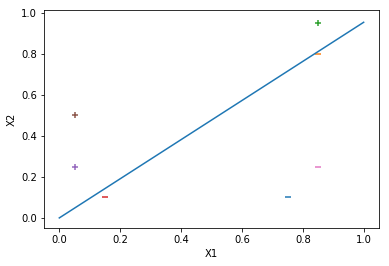

In [14]:
x1=np.linspace(0,1,100)
x2=1.05/1.1*x1
plt.plot(x1,x2)
plt.xlabel('X1')
plt.ylabel('X2')
for i in range(len(X)):
    if X[i][1]==1:
        plt.scatter(X[i][0][0], X[i][0][1], marker='+')
    else:
        plt.scatter(X[i][0][0], X[i][0][1], marker='_')
pass

For the linear decision boundaries passing through the origin, any one $X_2=kX_1$ with k between -0.85/0.8 and -0.85/0.95 would work

## (b) Grow a fully-grown decision tree using the reduction in the Gini index as the splitting criterion

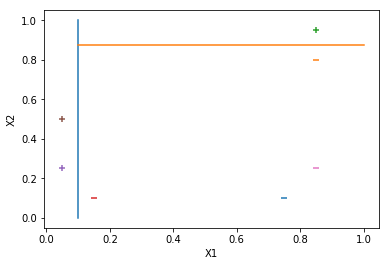

In [8]:
plt.plot([0.1 for i in range(100)], np.linspace(0,1,100))
plt.plot(np.linspace(0.1,1,100), [0.875 for i in range(100)])
plt.xlabel('X1')
plt.ylabel('X2')
for i in range(len(X)):
    if X[i][1]==1:
        plt.scatter(X[i][0][0], X[i][0][1], marker='+')
    else:
        plt.scatter(X[i][0][0], X[i][0][1], marker='_')
pass

The error is 0
for X1

In [1]:
def Gini_index(p):
    return 2*p*(1-p)

In [ ]:
# S: [(x, y)(x,y)...(x,y)]
#      |  |
#      |  S[i][1]:labels yi
#      S[i][0]:images xi(784,)

# X1[x1, x2, ..., xn] X2[x1, x2, ..., xn] 

def CART(X, Y, I):
    x=